In [103]:
import pandas as pd
import os
import geopandas as gpd
import re

In [104]:
FILENAME1 = 'Local_Authority_Districts_(December_2020)_UK_BFC.geojson'
FILENAME2 = 'all-domestic-certificates'

In [105]:
df_LA = gpd.read_file(FILENAME1)

df_LA.head()


,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,9.371263e+07,71007.443285,"MULTIPOLYGON (((-1.26846 54.72612, -1.26822 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,"MULTIPOLYGON (((-1.24928 54.59072, -1.24917 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,"MULTIPOLYGON (((-1.13485 54.64296, -1.13505 54..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,"MULTIPOLYGON (((-1.31729 54.64480, -1.31715 54..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."


Grabs LA code from each file name

In [106]:
path = "./all-domestic-certificates"
data = next(os.walk(path))[1]

cleared_data = list(data)

fn_df = pd.DataFrame(cleared_data, columns = ['Filename'])

new_df = fn_df['Filename'].str.split('-', expand = True)
fn_df['LAD20CD'] = new_df[1].values

fn_df.reset_index(inplace = True, drop = True)


Grabs averge energy values from csvs

In [107]:
csvs = []
for root, dirs, files in os.walk(path):
    for name in files:
        csvs.append(os.path.join(root, name))

mean_df = pd.DataFrame(columns = ['Filename', 'efficiency'])
index = 0

for file in csvs:
    if re.match(".*certificates.*certificates.*csv$",file):
        effic = pd.read_csv(file, low_memory = False)
        filename = re.search("domestic-[E|W|_].*\/", file).group(0)
        filename = filename.rstrip(filename[-1])
        mean = effic['CURRENT_ENERGY_EFFICIENCY'].mean()
        mean_df.loc[index] = [filename, mean]
        index = index + 1



Add two dataframes together

In [108]:
total_df = mean_df.merge(fn_df)

total_df.head()

,Filename,efficiency,LAD20CD
0,domestic-E07000133-Melton,60.819662,E07000133
1,domestic-E07000142-West-Lindsey,62.373837,E07000142
2,domestic-E08000019-Sheffield,63.683964,E08000019
3,domestic-E09000025-Newham,67.975458,E09000025
4,domestic-E07000150-Corby,68.326160,E07000150


Merge with geodata

In [109]:
gdf = gpd.read_file(FILENAME1)
df_energy = total_df.merge(gdf)

Plot

<AxesSubplot:>

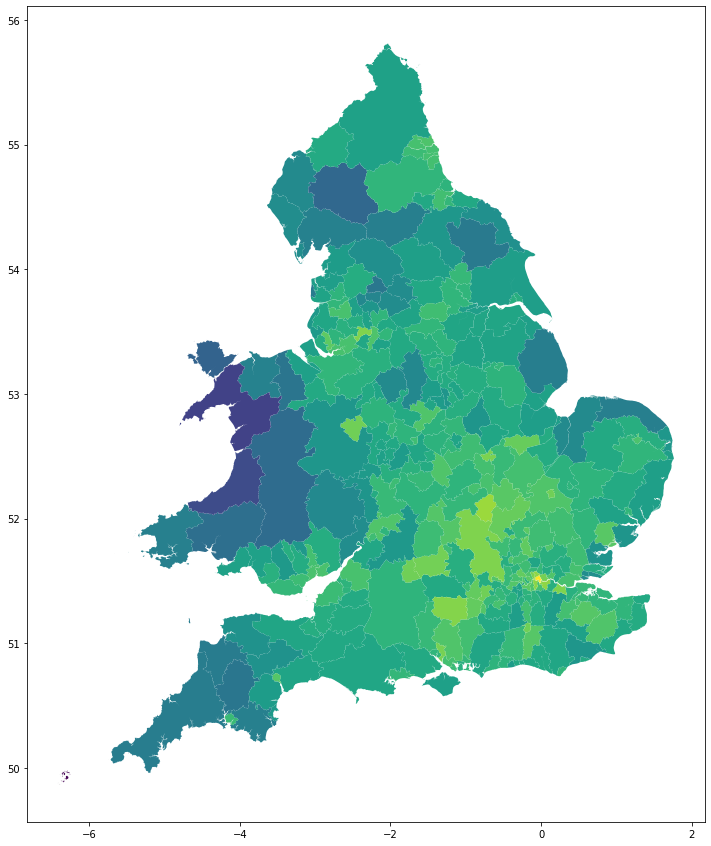

In [110]:
gdf = gpd.GeoDataFrame(
    df_energy, geometry= 'geometry')
gdf.plot('efficiency', figsize=(15,15))